## Importing libraries

In [22]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## Loading the cleaned dataset

In [23]:
df = pd.read_csv('Data/df_cleaned.csv')

In [24]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.696,0.8090,5,-8.254,1,0.0500,0.2520,0.000128,0.2480,0.8570,132.962,6AQbmUe0Qwf5PZnt4HmTXv,131013,4
1,0.707,0.6810,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.6460,117.999,0yLdNVWF3Srea0uzk55zFn,200455,4
2,0.644,0.7350,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.4180,88.980,1Qrg8KqiBpW07V7PNxwwwL,153947,4
3,0.538,0.7420,2,-5.355,1,0.1140,0.1380,0.000047,0.0934,0.2500,96.107,5Z2MiIZ5I3jJvvmeWMLbOQ,272373,4
4,0.715,0.6200,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.1720,97.950,2dHHgzDwk4BJdRwy9uXhTO,221520,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13052,0.261,0.0585,5,-22.054,0,0.0473,0.9870,0.872000,0.0887,0.1380,67.242,2IAnU53rak76TpGpA515Xl,439213,4
13053,0.322,0.1290,1,-20.671,1,0.0437,0.9920,0.003620,0.1010,0.0449,129.018,4zPZbj1sNxCOtU1CdgCK53,260187,4
13054,0.311,0.1580,10,-16.724,1,0.0380,0.9690,0.901000,0.2400,0.1700,96.367,2qYu0I9yKKpGnbySmN6w3K,427653,4
13055,0.456,0.1090,10,-20.268,1,0.0604,0.9940,0.000266,0.0836,0.2400,68.848,1xU1yjwGAGCCE3RiB8YKLe,201640,5


In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# assume df is your dataframe with all features
X = df.drop(columns=['id'])

# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform PCA
pca = PCA()
pca.fit(X_scaled)

# calculate explained variance ratio for each principal component
explained_variances = pca.explained_variance_ratio_

# choose number of principal components to keep based on explained variance
total_var = 0.0
n_components = 0
for i, explained_var in enumerate(explained_variances):
    total_var += explained_var
    if total_var >= 0.75:
        n_components = i + 1
        break

# fit PCA with chosen number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# extract feature names corresponding to selected principal components
pc_names = []
for i in range(n_components):
    pc_names.append('PC{}'.format(i+1))
    
# create new dataframe with selected principal components
df_pca = pd.DataFrame(data=X_pca, columns=pc_names)

# join id column back to the dataframe
#df_pca['id'] = df['id']

## Scaling features

In [26]:
X = df_pca

In [27]:
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.629216,-1.122566,-0.101448,-0.068943,-0.540188,-0.769669,-0.392317
1,-1.304756,-1.937348,-0.229264,0.840805,-0.174214,0.626416,0.402613
2,-0.818483,-0.334724,-0.398163,0.487172,-0.178747,-1.206988,-0.028667
3,-0.380136,-1.036660,0.331315,0.381882,0.658061,0.351037,0.346768
4,-0.142262,-0.211496,-0.771333,0.525466,0.528525,0.771146,1.580369
...,...,...,...,...,...,...,...
13052,4.487711,1.043491,-1.013480,0.744786,1.421058,0.151561,0.557991
13053,3.020417,-1.251000,0.673516,-0.207482,0.004399,0.633812,-0.584162
13054,3.669395,0.941875,0.239954,0.454024,0.805603,-1.067151,-1.216910
13055,2.335792,-0.551990,-1.789112,0.564206,1.269310,-1.576918,-2.194097


## Chosing K

## Silouhette

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 

Training a K-Means model with 21 clusters! 



Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

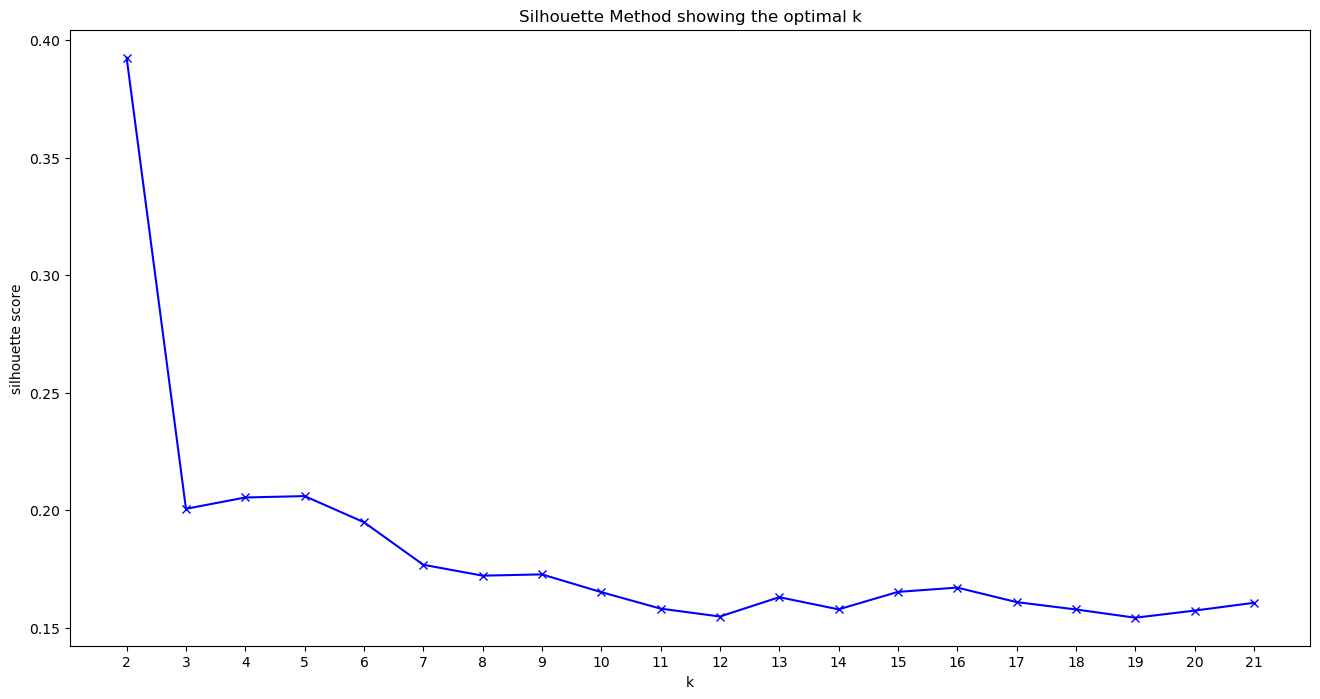

In [28]:
K = range(2, 22)
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X, kmeans.predict(X)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

The greater the Silouhette, the greater the separation between the clusters, In other words, the clusters will be more defined.

## Clustering the songs with K-Means

In [43]:
kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(X)

KMeans(n_clusters=7, random_state=1234)

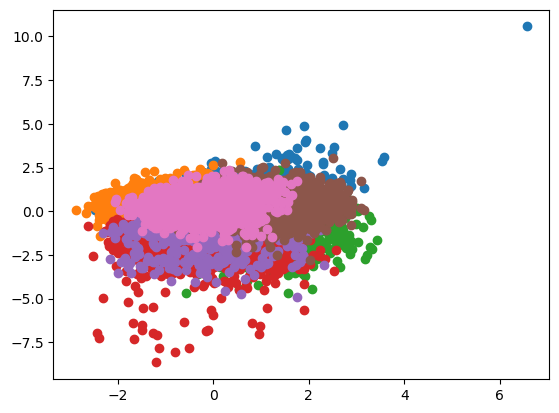

In [44]:
# assign a cluster to each example
labels = kmeans.predict(X)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

Now we have our "model", let's get the clusters and how many observations has each cluster.

In [46]:
clusters = kmeans.predict(X)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    1648
1    2596
2    1124
3     888
4     751
5    3330
6    2720
dtype: int64

Now let's see to which group was assigned every song.

In [47]:
#X_df = pd.DataFrame(X)
df["cluster"] = clusters

In [48]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,cluster
0,0.696,0.8090,5,-8.254,1,0.0500,0.2520,0.000128,0.2480,0.8570,132.962,6AQbmUe0Qwf5PZnt4HmTXv,131013,4,6
1,0.707,0.6810,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.6460,117.999,0yLdNVWF3Srea0uzk55zFn,200455,4,1
2,0.644,0.7350,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.4180,88.980,1Qrg8KqiBpW07V7PNxwwwL,153947,4,6
3,0.538,0.7420,2,-5.355,1,0.1140,0.1380,0.000047,0.0934,0.2500,96.107,5Z2MiIZ5I3jJvvmeWMLbOQ,272373,4,1
4,0.715,0.6200,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.1720,97.950,2dHHgzDwk4BJdRwy9uXhTO,221520,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13052,0.261,0.0585,5,-22.054,0,0.0473,0.9870,0.872000,0.0887,0.1380,67.242,2IAnU53rak76TpGpA515Xl,439213,4,0
13053,0.322,0.1290,1,-20.671,1,0.0437,0.9920,0.003620,0.1010,0.0449,129.018,4zPZbj1sNxCOtU1CdgCK53,260187,4,0
13054,0.311,0.1580,10,-16.724,1,0.0380,0.9690,0.901000,0.2400,0.1700,96.367,2qYu0I9yKKpGnbySmN6w3K,427653,4,0
13055,0.456,0.1090,10,-20.268,1,0.0604,0.9940,0.000266,0.0836,0.2400,68.848,1xU1yjwGAGCCE3RiB8YKLe,201640,5,0


## Playing with the parameters

In [49]:
kmeans.inertia_

58301.20302801356

# Saving with pickle

In [35]:
df.to_csv('test_PCA.csv', index=False)

In [36]:
# Save both objects together
with open("test_PCA.pkl", "wb") as f:
    pickle.dump((scaler, kmeans, pca), f)